In [4]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

import matplotlib.pyplot as plt 
import xarray as xr
import glob
import numpy as np

#import 
DATA_PATH = '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/'

In [8]:
era_path = '/home/hanna/lagrings/era_interim_data/'

In [11]:
glob.glob(era_path + "*_q_*" +'_all_cropped.nc')

[]

In [68]:
def load_data(start = "2012-01-01", stop = "2019-01-01", season = "SON", 
              era_path = '/uio/lagringshotell/geofag/students/metos/hannasv/era_interim_data/'):
    glob.glob(era_path + "*_all_cropped.nc")
    era_path = '/home/hanna/lagrings/era_interim_data/'
    """ Want all year put season to. """
    assert len(glob.glob(era_path + "*_q_*" + season +".nc")), "no data run cnct_lh in bash"
    q   = xr.open_dataset(glob.glob(era_path + '*_q_all_cropped.nc')[0]).q.values
    r   = xr.open_dataset(glob.glob(era_path + "*_r_all_cropped.nc")[0]).r.values
    tcc = xr.open_dataset(glob.glob(era_path + "*_tcc_all_cropped.nc")[0]).tcc.values
    sp  = xr.open_dataset(glob.glob(era_path + "*_sp_all_cropped.nc")[0]).sp.values
    t2m = xr.open_dataset(glob.glob(era_path + "*_t2m_all_cropped.nc")[0]).t2m.values
    assert np.shape(q) == np.shape(r) == np.shape(tcc) == np.shape(sp) == np.shape(t2m)
    
    nbr_times, nbr_lats, nbr_lon = np.shape(q)
    
    train = []
    true  = tcc[:, np.newaxis] # is wrong now
    
    dicts = {'q'  :[],
             'r'  :[],
             'sp' :[],
             'tcc':[],
             't2m':[]}
    
    lat_idx = 15
    lon_idx = 30
    
    for i in range(nbr_times):
        one_timestep = np.array([q[i][lat_idx][lon_idx], r[i][lat_idx][lon_idx], 
                                 sp[i][lat_idx][lon_idx], t2m[i][lat_idx][lon_idx], 
                                 tcc[i][lat_idx][lon_idx]])
                                 
        train.append(one_timestep)

    return np.array(train), true

In [69]:
train, true = load_data()

In [70]:
train.shape

(8772, 5)

In [52]:
train[:, 0]

array([0.00443908, 0.00435315, 0.00582048, ..., 0.00502638, 0.0041245 ,
       0.00414926], dtype=float32)

In [40]:
train[:][0][0][0].shape # [lat_idx].shape#[lon_idx]

(60,)

In [72]:
dicts = {'q':train[:, 0], 
         'r':train[:, 1], 
         'sp':train[:, 2],
         'tcc':train[:, 4],
         't2m':train[:, 3]}

In [54]:
import pandas as pd

In [80]:
df = pd.DataFrame.from_dict(dicts)

In [81]:
df

,q,r,sp,tcc,t2m
0,0.004439,81.216064,92733.734375,0.461372,275.481873
1,0.004353,84.318802,92844.687500,0.181604,275.238403
2,0.005820,78.779846,92994.703125,0.469017,282.233215
3,0.005307,87.438782,93055.507812,0.511042,279.011414
4,0.004923,89.119431,93012.007812,0.894225,278.068909
...,...,...,...,...,...
8767,0.003606,68.121368,92500.726562,0.582152,275.771637
8768,0.004318,83.477043,92278.812500,0.721837,276.197327
8769,0.005026,86.372932,92074.210938,0.676517,275.366852
8770,0.004124,64.978409,92215.789062,0.062412,278.363159


# AD fuller does what?
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

## SHould this be done for all variables?

ADF Statistic: -10.152440
p-value: 0.000000


In [73]:
def diff_variable(df, var):
    import numpy as np, pandas as pd
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    import matplotlib.pyplot as plt
    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
    result = adfuller(df[var].dropna())
    print('Var {}'.format(var))
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    # Import data
    #df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
    #var = 'sp'

    # Original Series
    fig, axes = plt.subplots(3, 2, sharex=True)
    axes[0, 0].plot(df[var]); axes[0, 0].set_title('Original Series')
    plot_acf(df[var], ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df[var].diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df[var].diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df[var].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(df[var].diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

    return 

Var sp
ADF Statistic: -10.152440
p-value: 0.000000


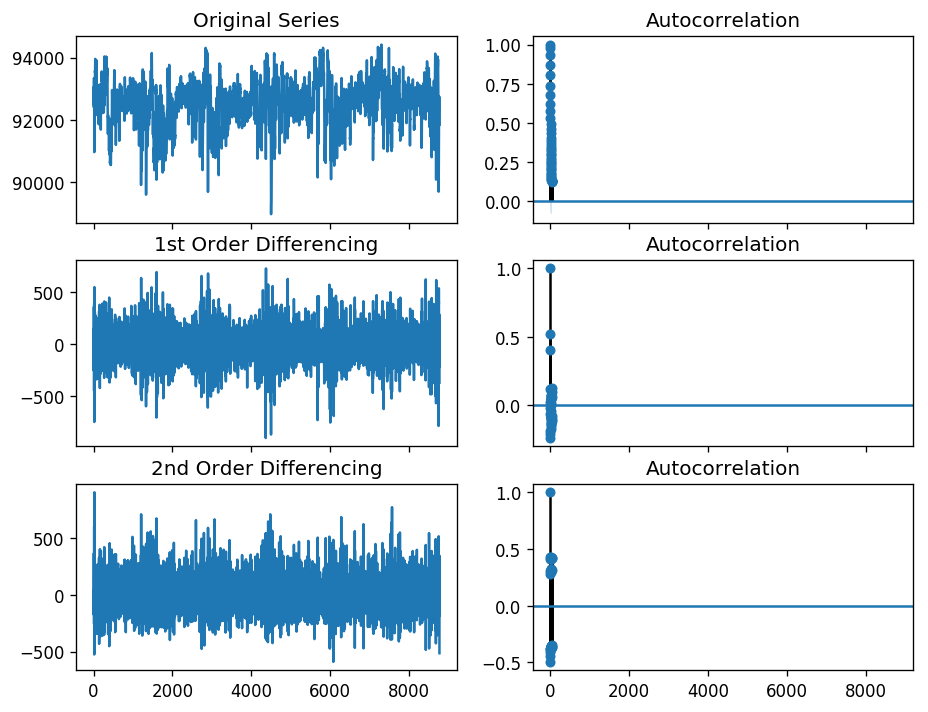

In [74]:
diff_variable(df, var='sp')

Var t2m
ADF Statistic: -3.156987
p-value: 0.022613


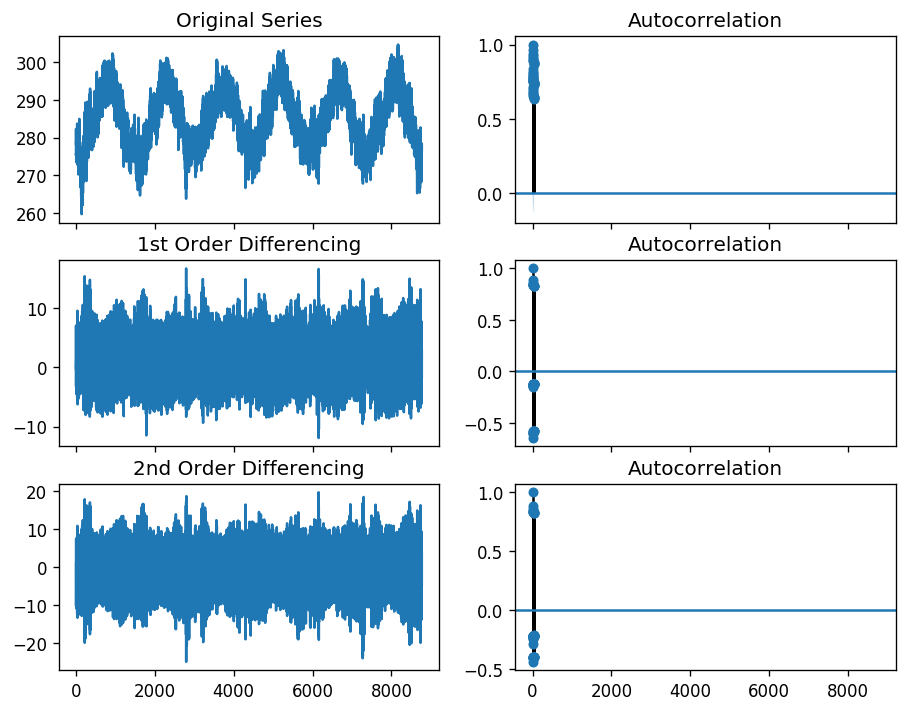

In [75]:
diff_variable(df, var='t2m')

Var r
ADF Statistic: -11.823147
p-value: 0.000000


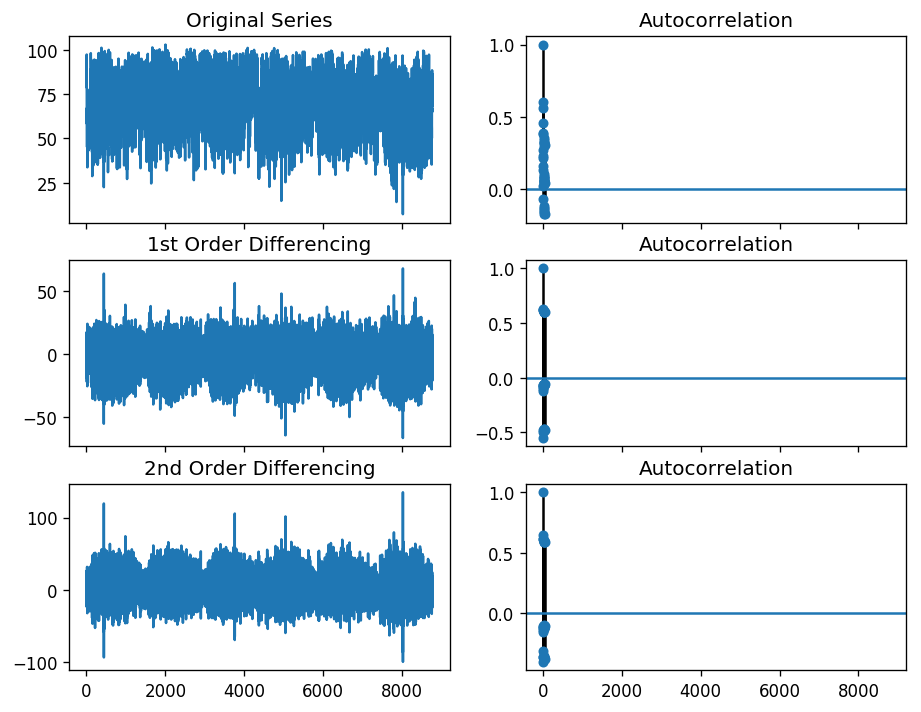

In [76]:
diff_variable(df, var='r')

Var q
ADF Statistic: -3.811331
p-value: 0.002793


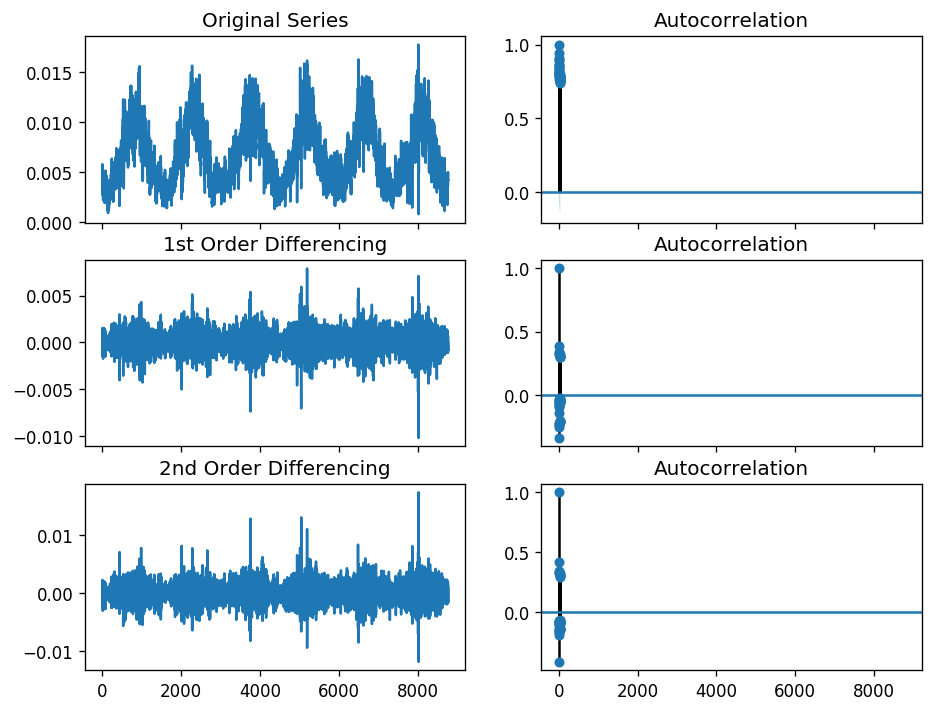

In [77]:
diff_variable(df, var='q')

Var tcc
ADF Statistic: -18.847593
p-value: 0.000000


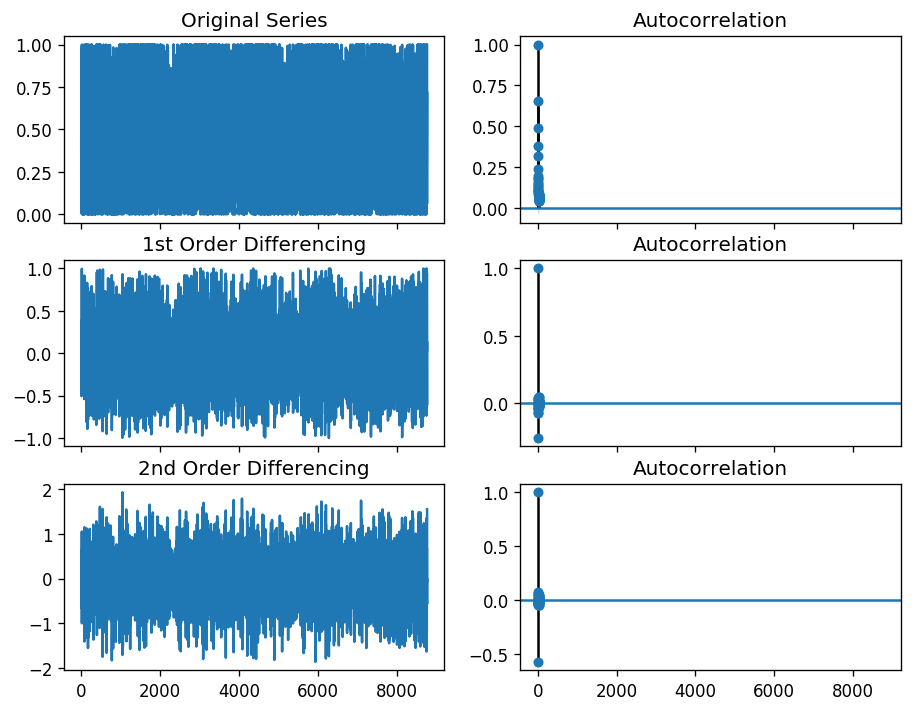

In [82]:
diff_variable(df, var='tcc')